In [122]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
import japanize_matplotlib
from IPython.display import display
import torch.optim as optim

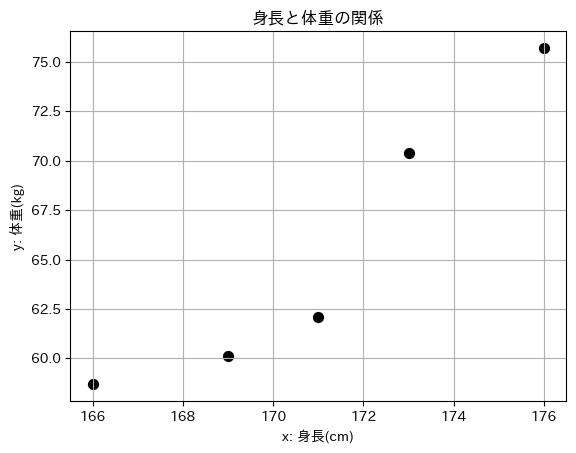

In [124]:
# データ
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

# データ分割
X = sampleData1[:, 0]
y = sampleData1[:, 1]

# データの図示
plt.scatter(X, y, c='k', s=50)
plt.xlabel('x: 身長(cm)')
plt.ylabel('y: 体重(kg)')
plt.title('身長と体重の関係')
plt.grid(visible=True)


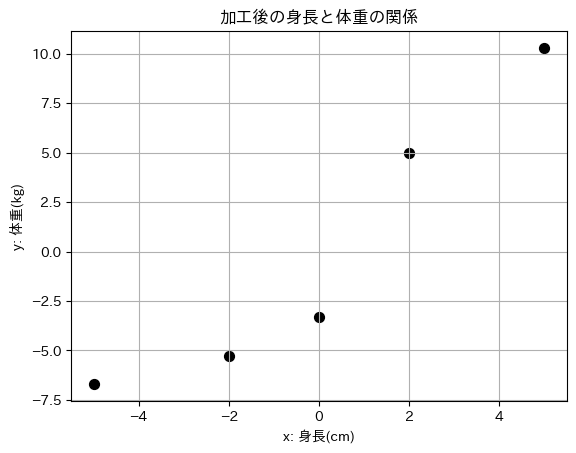

In [125]:
X -= X.mean()
y -= y.mean()

# データの図示
plt.scatter(X, y, c='k', s=50)
plt.xlabel('x: 身長(cm)')
plt.ylabel('y: 体重(kg)')
plt.title('加工後の身長と体重の関係')
plt.grid(visible=True)

In [126]:
# テンソルの変換
X = torch.tensor(X).float()
y = torch.tensor(y).float()


In [127]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad= True).float()

In [92]:
def pred(X):
    return W * X + B

In [47]:
Yp = pred(X)

In [48]:
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


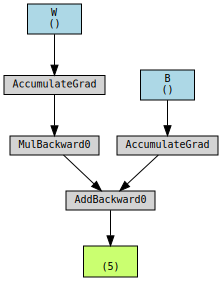

In [49]:
# 計算グラフ
params = {'W':W, 'B':B}
g = make_dot(Yp, params=params)
g

In [93]:
# 損失関数MSEの計算
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

In [51]:
loss = mse(Yp, y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


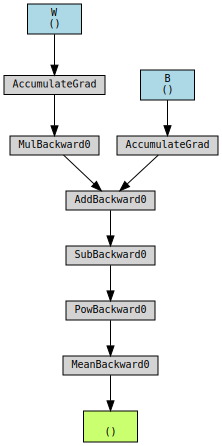

In [52]:
# lossの計算グラフ
params = {'W':W, 'B':B}
g = make_dot(loss, params=params)
g

In [53]:
loss.backward()

In [54]:
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [56]:
lr = 0.001 

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

In [58]:
W.grad.zero_()
B.grad.zero_()

tensor(0.)

In [60]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


## 繰り返し処理

In [94]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad= True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))


for epoch in range(num_epochs):
    
    Yp = pred(X)
    loss = mse(Yp, y)
    
    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

        W.grad.zero_()
        B.grad.zero_()

    if epoch%10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss = {loss:.4f}")

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [97]:
print("W = ", W.data.numpy())
print("B = ", B.data.numpy())

print(f'初期状態: 損失:{history[0, 1]:.4f}')
print(f'最終状態: 損失:{history[-1, 1]:.4f}')


W =  1.820683
B =  0.3675114
初期状態: 損失:13.3520
最終状態: 損失:4.6796


Text(0, 0.5, 'loss')

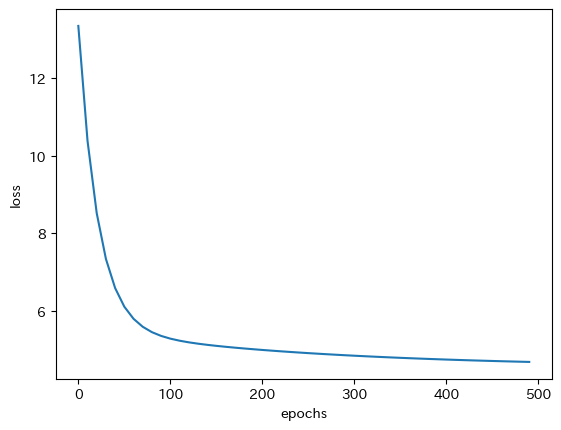

In [101]:
# 学習曲線

plt.plot(history[:, 0], history[:, 1])
plt.xlabel('epochs')
plt.ylabel('loss')

In [114]:
w = W.data.detach().numpy()
b = B.data.detach().numpy()
x = X.data.detach().numpy()

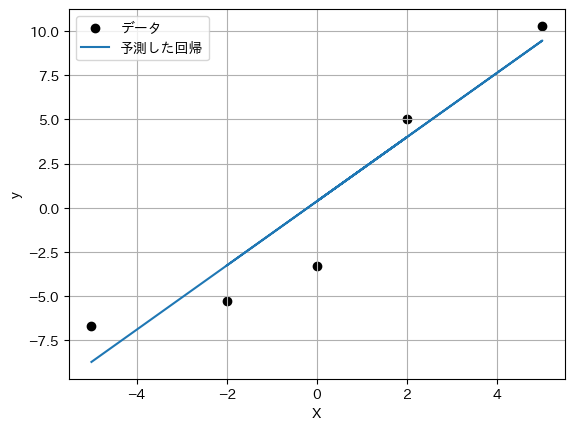

In [121]:
plt.scatter(X, y, color='k', label='データ')
plt.plot(X, w*x.data+b, label='予測した回帰')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## 最適化関数の利用

In [131]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad= True).float()

num_epochs = 500

lr = 0.001

# 最適化関数
optimizer = optim.SGD([W, B], lr=lr)

history = np.zeros((0, 2))


for epoch in range(num_epochs):
    
    Yp = pred(X)
    loss = mse(Yp, y)
    
    loss.backward()

    # with torch.no_grad():
    #     W -= lr * W.grad
    #     B -= lr * B.grad

    #     W.grad.zero_()
    #     B.grad.zero_()

    # パラメータの更新
    optimizer.step()
    
    # 勾配の初期化
    optimizer.zero_grad()

    if epoch%10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss = {loss:.4f}")

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [129]:
W

tensor(1., requires_grad=True)

In [130]:
B

tensor(1., requires_grad=True)